<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part One: Data Input </h2>	


<h3>  Import Statements </h3>	


In [1]:
#Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
import os
import re
import cv2

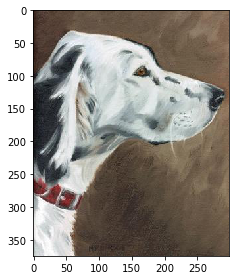

,Pictures,Encoding
0,"[[[46, 23, 17], [50, 27, 21], [55, 35, 28], [6...",1
1,"[[[50, 43, 27], [53, 45, 32], [51, 43, 30], [4...",2


In [2]:
#Example of reading in a file
skimage.data_dir = ''

filename = os.path.join(skimage.data_dir, 'd.jpg')
dog = io.imread(filename)
skimage.io.imshow(dog)

plt.show()
filename2 = os.path.join(skimage.data_dir, 'c.jpg')
cat = io.imread(filename2)
example_data_frame= pd.DataFrame()


example_data_frame['Pictures']=[dog, cat]
example_data_frame['Encoding']=[1,2]
example_data_frame

<h4> Using the code for reference, take the given folder and create a dataframe with the picture object, and the encoding as listed below. </h4>	
0=Airplanes, 1=Bear, 2=Blimp, 3=Comet, 4=Crab, 5=Dog, 6=Dolphin, 7=Giraffe, 8=Goat, 9=Gorilla, 10=Kangaroo, 11=Killer-Whale, 12=Leopards, 13=Llama, 14= Penguin, 15= Porcupine, 16=Teddy-Bear, 17=Triceratops, 18=Unicorn, 19=Zebra

In [3]:
def extract_int(name):
    def convert_int(s):
        try:
            return int(s)
        except:
            return None
    return [convert_int(c) for c in re.split('([0-9]+)', name)]

In [4]:
def read_organize_data(file_path):
    #Fill this function out, should return a dataframe with picture object, and correct encoding
    data_frame = pd.DataFrame()
    pic_list = []
    encode_list = []
    filenames = os.listdir(file_path)
    filenames.sort(key=extract_int)
    for filename in filenames:
        if filename[0] != '.': # Just readin useful jpg
            name = filename.split('_')[0] #get the picture type
            encode = encoding_dist[name] #get the encode
            file = os.path.join(file_path, filename)
            pic = io.imread(file)
            if len(pic.shape) == 3:
                pic_list.append(pic)
                encode_list.append(encode)
            else:
                img = io.imread(file)
                print(file)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                pic_list.append(img_rgb)
                encode_list.append(encode)
    data_frame['Pictures'] = pic_list
    data_frame['Encoding'] = encode_list
    return data_frame

In [5]:
encoding_dist = {'validation':-1, 'airplanes':0, 'bear':1, 'blimp':2, 'comet':3, 'crab':4, 'dog':5, 'dolphin':6, 'giraffe':7, 'goat':8, 'gorilla':9, 'kangaroo':10\
                , 'killer-whale':11, 'leopards':12, 'llama':13, 'penguin':14, 'porcupine':15, 'teddy-bear':16, 'triceratops':17, 'unicorn':18, 'zebra':19}
# For test set, the label is unknown, so here encode them to -1

In [6]:
test_data = read_organize_data('20_Validation')


20_Validation\validation_pic (182).jpg
20_Validation\validation_pic (188).jpg
20_Validation\validation_pic (189).jpg
20_Validation\validation_pic (252).jpg
20_Validation\validation_pic (361).jpg
20_Validation\validation_pic (394).jpg
20_Validation\validation_pic (395).jpg
20_Validation\validation_pic (526).jpg
20_Validation\validation_pic (538).jpg
20_Validation\validation_pic (645).jpg
20_Validation\validation_pic (665).jpg


In [7]:
def get_train_data(train_path):
    train_data = pd.DataFrame(columns = ['Pictures','Encoding'])
    for types in os.listdir(train_path): #run read_organize_data for each folder(each type of training data)
        if (types[0] >= 'a' and types[0] <= 'z'): 
            filepath = os.path.join(train_path, types)
            train_data_type = read_organize_data(filepath)
            train_data = pd.concat([train_data,train_data_type])
    return train_data

In [8]:
train_path = '20_categories_training/20_categories_training'
train_data = get_train_data(train_path)
train_data

20_categories_training/20_categories_training\blimp\blimp_0022.jpg
20_categories_training/20_categories_training\comet\comet_0006.jpg
20_categories_training/20_categories_training\comet\comet_0011.jpg
20_categories_training/20_categories_training\comet\comet_0013.jpg
20_categories_training/20_categories_training\comet\comet_0021.jpg
20_categories_training/20_categories_training\comet\comet_0036.jpg
20_categories_training/20_categories_training\comet\comet_0038.jpg
20_categories_training/20_categories_training\comet\comet_0041.jpg
20_categories_training/20_categories_training\comet\comet_0049.jpg
20_categories_training/20_categories_training\comet\comet_0052.jpg
20_categories_training/20_categories_training\comet\comet_0053.jpg
20_categories_training/20_categories_training\comet\comet_0057.jpg
20_categories_training/20_categories_training\comet\comet_0058.jpg
20_categories_training/20_categories_training\crab\crab_0045.jpg
20_categories_training/20_categories_training\dolphin\dolphin_00

,Pictures,Encoding
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,"[[[174, 190, 187], [173, 189, 186], [172, 188,...",0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
...,...,...
59,"[[[159, 129, 105], [155, 125, 99], [152, 122, ...",19
60,"[[[162, 145, 115], [164, 145, 115], [165, 146,...",19
61,"[[[126, 155, 247], [126, 155, 247], [128, 157,...",19
62,"[[[10, 195, 0], [48, 255, 33], [21, 236, 44], ...",19


In [9]:
train_data.to_pickle('train_data.pkl')
test_data.to_pickle('test_data.pkl')